# (Investigating trends Philadelphia bikashare dataset for 2020 Q3 )
## by (Amira Alakhdar)

## Investigation Overview

> The Indego bikes trip data shall be nvestigated for :
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the duration depend on if a bike is a standard or electric?
- Does the duration depend on passholder type?
- Does the trip route category affect the duration?
- What are the popular start and end locations? Do they change according to different variables?

## Dataset Overview

> The City of Philadelphia bikashare dataset (2020 Q3) has information about bike trips durations, start time, start and end locations, bike type, trip type and subscription type. It can be find here: https://www.rideindego.com/about/data/

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import zipfile
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
url = 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2020/10/indego-trips-2020-q3.zip'
r = requests.get(url, allow_redirects=True)
open('indego-trips-2020-q3.zip', 'wb').write(r.content)



4957342

In [3]:
with zipfile.ZipFile('indego-trips-2020-q3.zip', 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('indego-trips-2020-q3.csv')


In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['month'] = df['start_time'].dt.month
df['day_of_week'] = df['start_time'].dt.weekday

days = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
weekday= df['day_of_week']
day_names=[]
for i in weekday:
    day_names.append(days[i])
df['day_of_week'] = day_names

df.columns = df.columns.str.replace('_', ' ')
df['duration (minutes)'] = df.duration
df = df.drop(['duration'], axis=1)

df = df.dropna()

## (Distribution of Trip Duration )

> Duration showed a normal logaritmic distribution, with a lot bars in the high end, and fewer bars on the low price end, but one of them shows a significant frequency between 4-5 minutes.

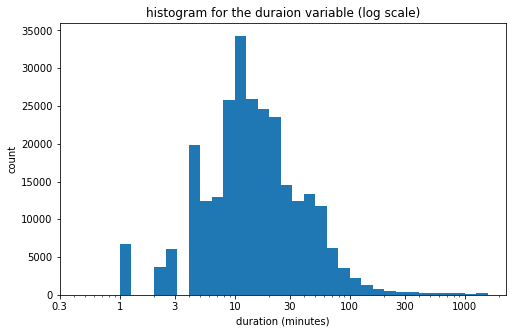

In [5]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration (minutes)'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration (minutes)', bins = bins)
plt.xscale('log')
plt.xlabel('duration (minutes)')
plt.ylabel('count')
plt.title('histogram for the duraion variable (log scale)')
plt.xticks(ticks= [0.3, 1, 3, 10, 30, 100, 300, 1000], labels=['0.3', '1', '3', '10', '30', '100', '300', '1000'])

plt.show()

## (Distribution of bike type, passholder type and trip route category variables)

> The analysis showed that:
- about 80% of the trips are done with strandard bike type, and the remaining use electric bikes.
- Indego30 is the most frequent pass holder type in all trips.
- Over 80% of the trips are One way route type. 

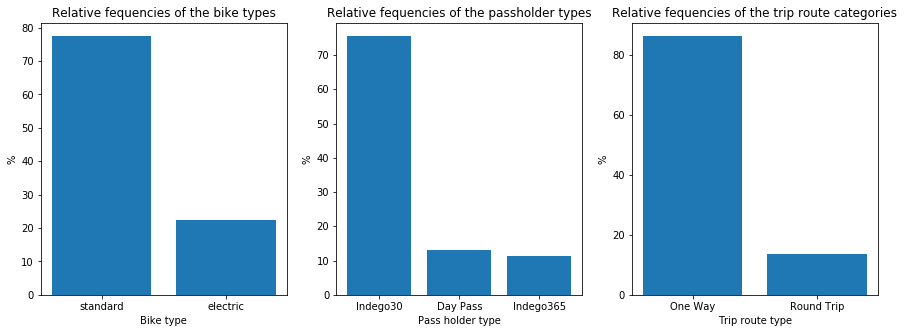

In [6]:


plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)

freq_b = df['bike type'].value_counts() / len(df)
indx = [0,1]
plt.bar(indx, freq_b*100)
plt.ylabel('%')
plt.title('Relative fequencies of the bike types')
plt.xticks(indx, freq_b.index)
plt.xlabel('Bike type')



plt.subplot(1, 3, 2)
freq_p = df['passholder type'].value_counts().sort_values(ascending=False) / len(df)
indx = [0,1,2]
plt.bar(indx, freq_p*100)
plt.ylabel('%')
plt.title('Relative fequencies of the passholder types')
plt.xticks(indx, freq_p.index)
plt.xlabel('Pass holder type')





plt.subplot(1, 3, 3)
freq_m = df['trip route category'].value_counts().sort_values(ascending=False) / len(df)
indx = [0,1]
plt.bar(indx, freq_m*100)
plt.ylabel('%')
plt.title('Relative fequencies of the trip route categories')
plt.xticks(indx, freq_m.index)
plt.xlabel('Trip route type');

## (Popular start and end locations)

> The two graphs for popoular start locations and popular end locations look identical which means that there are areas with higher numbers of bike riders where the company should increase the number of bikes.

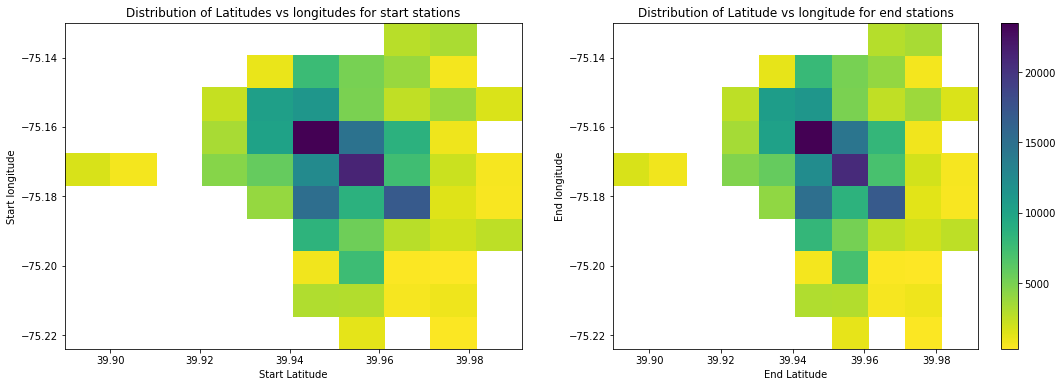

In [7]:
plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 1)
plt.hist2d(data = df, x = 'start lat', y = 'start lon', cmin=0.5, cmap='viridis_r')
plt.title('Distribution of Latitudes vs longitudes for start stations')
plt.xlabel('Start Latitude')
plt.ylabel('Start longitude');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'end lat', y = 'end lon', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title('Distribution of Latitude vs longitude for end stations')
plt.xlabel('End Latitude')
plt.ylabel('End longitude');


## (The effect of trip type and passholder type on duration)

> The graph showed the same trend where duration was the highest in daily subscription followed by monthly subscription, and yearly subscriper making the shortest duration averages.
Round trips had higher trip averages than one way trips in the 3 subscription catagories.

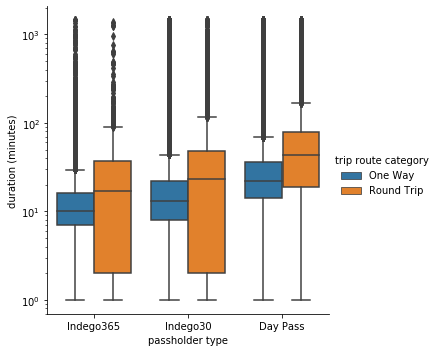

In [8]:
sb.catplot(x='passholder type', y='duration (minutes)', hue='trip route category', kind="box", data=df)
plt.yticks(ticks= [0.3, 1, 3, 10, 30, 100, 300, 1000], labels=['0.3', '1', '3', '10', '30', '100', '300', '1000'])
plt.yscale('log')


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!